#### Outlier 

An outlier is a data point which is significantly different from the remaining data. \"An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism. [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

##### Should outliers be removed?
Depending on the context, outliers either deserve special attention or should be completely ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card is usually a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and investigate further outlier values.

If outliers are however, introduced due to mechanical error, measurement error or anything else that can't be generalised, it is a good idea to remove these outliers before feeding the data to the modeling algorithm. Why? Because some algorithms are sensitive to outliers.

##### Which machine learning models are sensitive to outliers?
Some machine learning models are more sensitive to outliers than others. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.

Linear models, in particular Linear Regression, can be also sensitive to outliers.

Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= a certain value, and therefore the outlier will fall on each side of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

A recent research article suggests that Neural Networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (>15% as suggested in the article), then they are no longer outliers, and rather a fair representation of that variable. A link to this article can be found in the "Additional reading resources" lecture within this section of the course.


#### How can outliers be identified?
Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations. These are mostly targeted to identify outliers when those are the observations that we indeed want to focus on, for example for fraudulent credit card activity.

Here we will identify the outlier caused by measurement or mechanical error. Those outliers that are indeed a rare case in the population, and that could be ignored


#### Extreme Value Analysis
The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then find the values that sit at the very end of the tails.

If the the variable is Normally distributed (Gaussian), then the values that lie outside the mean plus or minus 3 times the standard deviation of the variable are considered outliers.

- Outliers = mean +/- 3* std
If the variable is skewed distributed, a general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows:

- IQR = 75th quantile - 25th quantile
An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)


In this notebook:
- Identify outliers using complete case analysis in Normally distributed variables.
- Identify outliers using complete case analysis in skewed variables.

Datasets: Housing price, and titanic 


In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as stats 

from sklearn.datasets import load_boston

In [28]:
# load the booston dataset
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
boston_dataset = load_boston()

boston = pd.DataFrame(
    boston_dataset.data, 
    columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

boston.head()


,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [30]:
# titanic datset
titanic = pd.read_csv('../datasets/titanic.csv', usecols=['age','fare'])

# we know that the age and fare have missing values
titanic.dropna(subset=['age', 'fare'], inplace=True)
titanic.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


##### Identify variable distribution
In Normally distributed variables, outliers are those values that lie beyond the mean plus or minus 3 times the standard deviation. If the variables are skewed however, we find outliers using the inter-quantile range. In order to decide which method to utilise to detect outliers, we first need to know the distribution of the variable.

We can use histograms and Q-Q plots to determine if the variable is normally distributed. We can also use boxplots to directly visualise the outliers. Boxplots are a standard way of displaying the distribution of a variable utilising the first quartile, the median, the third quartile and the whiskers.

Looking at a boxplot, you can easily identify:

- The median, indicated by the line within the box.
- The inter-quantile range (IQR), the box itself.
- The quantiles, 25th (Q1) is the lower and 75th (Q3) the upper end of the box.
- The wiskers, which extend to: -- top whisker: Q3 + 1.5 x IQR -- bottom whisker: Q1 -1.5 x IQR

Any value sitting outside the whiskers is considered an outlier. Let's look at the examples below.

In [31]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16,4))

    # histogram
    plt.subplot(1,3,1)
    sns.histplot(df[variable], bins=30)
    plt.title(f"{variable} histogram")

    # Q-Q plot 
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM Quantiles')

    # box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title(f"{variable} Boxplot")

    plt.show()

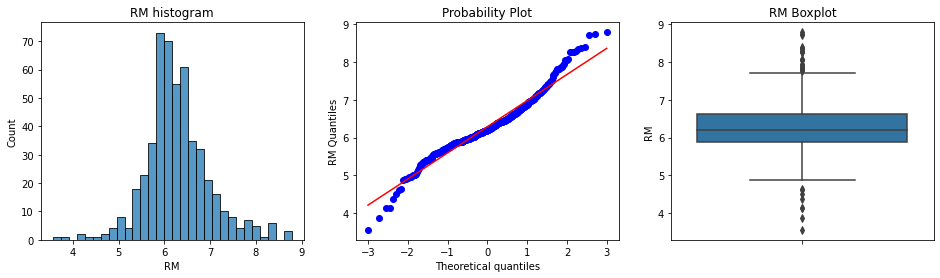

In [32]:
diagnostic_plots(boston, 'RM')

From the histogram and the Q-Q plot, we see that the variable rm approximates a Gaussian distribution quite well. In the boxplot, we see that the variable could have outliers, as there are many dots sitting outside the whiskers, at both tails of the distribution.

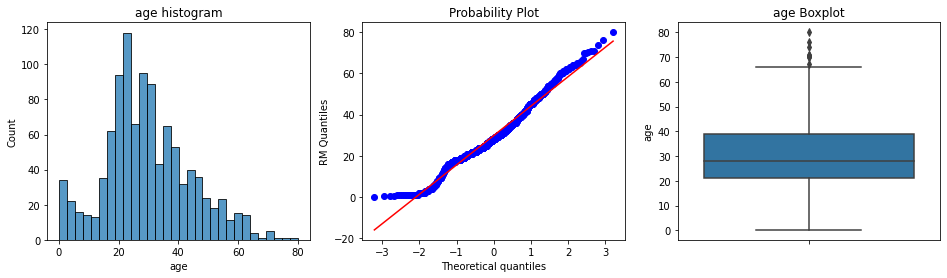

In [33]:
# Lets investigate the titanic dataset for age variable
diagnostic_plots(titanic, 'age')

From the histogram and the Q-Q plot, we see that the variable approximates fairly well a Gaussian distribution. There is a deviation from the distribution towards the smaller values of age. In the boxplot, we can see that the variable could have outliers, as there are many dots sitting outside the whiskers, at the right end of the distribution (top whisker in the boxplot).

#### Skewed variables


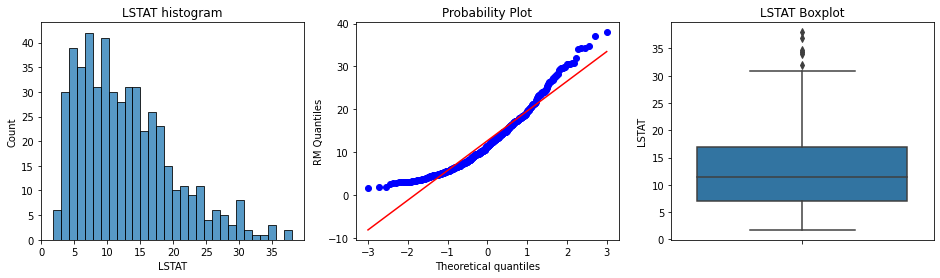

In [34]:
diagnostic_plots(boston, 'LSTAT')

LSTAT is not normally distributed, it is skewed with a tail to the right. According to the boxplot, there are some outliers at the right end of the distribution of the variable.

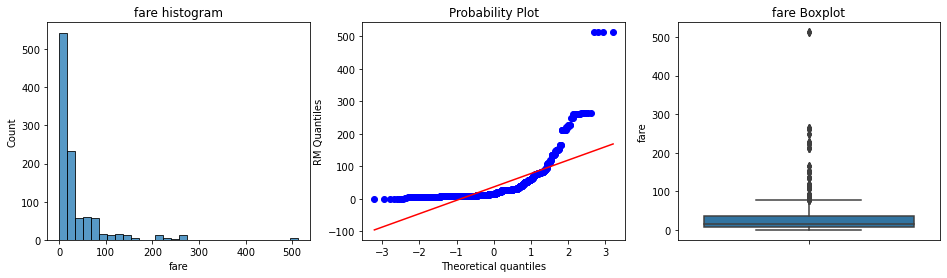

In [35]:
diagnostic_plots(titanic, 'fare')

Fare is also very skewed, and shows some unusual values at the right end of its distribution.

In the next cells We will identify outliers using the mean and the standard deviation for the variables RM and Age from the boston and titanic datasets, respectively. Then we will use the inter-quantile range to identify outliers for the variables LSTAT, CRIM and Fare from the boston and titanic datasets.

##### Outlier detection for Normally distributed variables

In [36]:
def find_normal_boundaries(df, variable):
    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [37]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
print(f"upper boundary: {upper_boundary}, lower boundary: {lower_boundary}")


upper boundary: 8.392485817597748, lower boundary: 4.176782957105809


In [38]:
print('total number of houses: {}'.format(len(boston)))

print('houses with more than 8.4 rooms (right end outliers): {}'.format(
    len(boston[boston['RM'] > upper_boundary])))
print('% right end outliers: {}\n'.format(
    len(boston[boston['RM'] > upper_boundary]) / len(boston)))

print('houses with less than 4.2 rooms (left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary])))
print('% left end outliers: {}\n'.format(
    len(boston[boston['RM'] < lower_boundary]) / len(boston)))

total number of houses: 506
houses with more than 8.4 rooms (right end outliers): 4
% right end outliers: 0.007905138339920948

houses with less than 4.2 rooms (left end outliers: 4
% left end outliers: 0.007905138339920948



Using Extreme Value Analysis we identified outliers at both ends of the distribution of RM. The percentage of outliers is small (1.4% considering the 2 tails together), which makes sense, because we are finding precisely outliers. That is, rare values, rare occurrences.

In [39]:
upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
print(f"upper boundary: {upper_boundary}, lower boundary: {lower_boundary}")

upper boundary: 73.01943709155127, lower boundary: -13.315768766192416


In [40]:
print('total passengers: {}'.format(len(titanic)))

print('passengers older than upper boundary: {}'.format(
    len(titanic[titanic['age'] > upper_boundary])))

print('% of passengers older than upper boundary: {}'.format(
    len(titanic[titanic['age'] > upper_boundary]) / len(titanic)))

total passengers: 1045
passengers older than upper boundary: 3
% of passengers older than upper boundary: 0.0028708133971291866


There were 2 passengers older than 73 on board of the titanic, which could be considered outliers, as the majority of the population where much younger.

##### Outlier detection for skewed variables

In [41]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [42]:
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
print(f"upper skewed boundary: {upper_boundary}, lower skewed boundary: {lower_boundary}")

upper skewed boundary: 31.962500000000006, lower skewed boundary: -8.057500000000005


In [49]:
print('total houses: {}'.format(len(boston)))

print('houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])))
print()
print('% houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])/len(boston)))

total houses: 506
houses with LSTAT bigger than 32: 176

% houses with LSTAT bigger than 32: 0.34782608695652173


The upper boundary shows a value of ~32. The lower boundary is negative, however the variable LSTAT does not take negative values. So to calculate the outliers for LSTAT we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of LSTAT's distribution.

We observe 7 houses, 1.3 % of the dataset, with extremely high values for LSTAT.

In [48]:
upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
print(f"upper skewed boundary: {upper_boundary}, lower skewed boundary: {lower_boundary}")

print('total houses: {}'.format(len(boston)))

print('houses with CRIM bigger than 14: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary])))
print()
print('% houses with CRIM bigger than 14s: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary]) / len(boston)))

upper skewed boundary: 14.462195000000001, lower skewed boundary: -10.7030675
total houses: 506
houses with CRIM bigger than 14: 30

% houses with CRIM bigger than 14s: 0.05928853754940711


In [47]:

upper_boundary, lower_boundary = find_skewed_boundaries(titanic, 'fare', 3)
print(f"upper skewed boundary: {upper_boundary}, lower skewed boundary: {lower_boundary}")
print(f"total pessangers: {len(titanic)}")

print(f"Passengers older than upper bound: {len(titanic[titanic['fare'] > upper_boundary])}")

print(f"% of Passengers older than upper bound: {len(titanic[titanic['fare'] > upper_boundary])/len(titanic)}")


upper skewed boundary: 117.85, lower skewed boundary: -74.3
total pessangers: 1045
Passengers older than upper bound: 67
% of Passengers older than upper bound: 0.06411483253588517


For Fare, as well as for all the other variables in this notebook which show a tail to the right, the lower boundary is negative. So we will use the upper boundary to determine the outliers. We observe that 6% of the values of the dataset fall above the boundary.